Copyright 2020 Google LLC

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    https://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

In [1]:
import torch
from PIL import Image
import PIL.ImageOps
import numpy as np

import matplotlib.pyplot as plt

import cv2

import train

def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

In [10]:
1 if np.random.uniform() < 0.2 else 1_000

1000

In [3]:
net = train.train_unet(epochs=200)

epoch 1 of 200
epoch loss 3.978890033904463, validation loss 1.215667088283226
learning rate 0.001
epoch 2 of 200
epoch loss 1.113787692040205, validation loss 1.071066017029807
learning rate 0.001
epoch 3 of 200
epoch loss 1.0235067524481565, validation loss 0.9571727202273905
learning rate 0.001
epoch 4 of 200
epoch loss 0.9463656535372138, validation loss 0.9051235022488981
learning rate 0.001
epoch 5 of 200
epoch loss 0.9018528889864683, validation loss 0.8720558078493923
learning rate 0.001
epoch 6 of 200
epoch loss 0.9285122770816088, validation loss 0.8723583881510422
learning rate 0.001
epoch 7 of 200
epoch loss 0.8560794064542279, validation loss 0.8164576903218403
learning rate 0.001
epoch 8 of 200
epoch loss 0.8117755115963519, validation loss 0.7573802446713671
learning rate 0.001
epoch 9 of 200
epoch loss 0.8226783389691263, validation loss 0.7913737187627703
learning rate 0.001
epoch 10 of 200
epoch loss 0.8077319025760517, validation loss 0.7391694745747373
learning rate

epoch loss 0.04013515283259039, validation loss 0.0397744167285623
learning rate 0.0001
epoch 82 of 200
epoch loss 0.040812978895701235, validation loss 0.040684837118533324
learning rate 0.0001
epoch 83 of 200
epoch loss 0.04013727910751186, validation loss 0.03800720323755513
learning rate 0.0001
epoch 84 of 200
epoch loss 0.038603198923823356, validation loss 0.039473862594604725
learning rate 0.0001
epoch 85 of 200
epoch loss 0.03941976224848531, validation loss 0.036876616318068045
learning rate 0.0001
epoch 86 of 200
epoch loss 0.03698588551344528, validation loss 0.03545367308981895
learning rate 0.0001
epoch 87 of 200
epoch loss 0.03531797868845388, validation loss 0.03408115555725999
learning rate 0.0001
epoch 88 of 200
epoch loss 0.034559096503130604, validation loss 0.033289297679175434
learning rate 0.0001
epoch 89 of 200
epoch loss 0.0342561528564147, validation loss 0.03405351655771938
learning rate 0.0001
epoch 90 of 200
epoch loss 0.03415317876664403, validation loss 0.

epoch loss 0.007236769317103153, validation loss 0.007108196351737206
learning rate 1e-05
epoch 159 of 200
epoch loss 0.007107083305470496, validation loss 0.006990715500137412
learning rate 1e-05
epoch 160 of 200
epoch loss 0.0070048968915443766, validation loss 0.0069759672211944235
learning rate 1e-05
epoch 161 of 200
epoch loss 0.0069003086671273195, validation loss 0.006784901196397186
learning rate 1e-05
epoch 162 of 200
epoch loss 0.006772907783556548, validation loss 0.006647874599480019
learning rate 1e-05
epoch 163 of 200
epoch loss 0.0066743803326403395, validation loss 0.006571808811941082
learning rate 1e-05
epoch 164 of 200
epoch loss 0.00656185494329975, validation loss 0.006473764447093799
learning rate 1e-05
epoch 165 of 200
epoch loss 0.006488631059426098, validation loss 0.006368591025022852
learning rate 1e-05
epoch 166 of 200
epoch loss 0.006378182677735822, validation loss 0.006268165587016483
learning rate 1e-05
epoch 167 of 200
epoch loss 0.006262788016840659, v

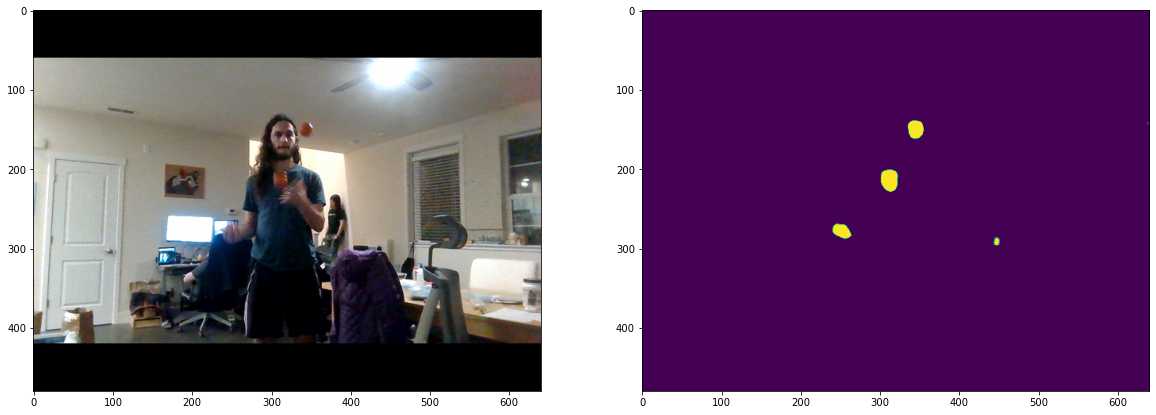

In [5]:
net.train(False)
device = torch.device('cuda')
net.to(device=device)


with torch.no_grad():
    img = Image.open('data/cap3/img/100.png')
    img = torch.from_numpy(np.array(img).transpose((2, 0, 1))).type(torch.FloatTensor).to(device=device)
    pred = net(img.unsqueeze(0)).squeeze(0).squeeze(0)
    pred = sigmoid(pred)

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(img.cpu().numpy().transpose((1, 2, 0)) / 256)
plt.subplot(1, 2, 2)
plt.imshow(pred.cpu().numpy(), vmax=1, vmin=0)

In [7]:
# a = torch.nn.functional.max_pool2d(pred.unsqueeze(0), 3, stride=1, padding=1).squeeze(0)
# mask = (a == pred) & (pred > 0.5)
# plt.imshow(mask.cpu().numpy())


def find_balls(pred):
    balls = []

    while True:
        a = torch.nn.functional.conv2d(pred.unsqueeze(0).unsqueeze(0), torch.ones(1, 1, 20, 20).to(device=device)).squeeze(0).squeeze(0)
        if torch.max(a) < 0.6 * 20 * 20:
            break
        max_index = torch.argmax(a)
        max_x = max_index % a.shape[1] + 10
        max_y = max_index // a.shape[1] + 10
        pred[max_y-20:max_y+20, max_x-20:max_x+20] = 0
        balls.append((max_x, max_y))

    return balls
#     plt.imshow(img.cpu().numpy().transpose((1, 2, 0)) / 256)
#     for i in range(3):
#         plt.plot([xs[i]], [ys[i]], 'ro')

In [7]:
npa = a.cpu().numpy()
np.where(npa == np.max(npa))

NameError: name 'a' is not defined

In [8]:
torch.argmax(torch.tensor([[1, 2, 3], [3, 100, 5]]))

tensor(4)

In [9]:
a.shape

NameError: name 'a' is not defined

In [10]:
from pykalman import KalmanFilter
import scipy
import scipy.optimize

# state = [x, v_x, a_x, y, v_y, a_y]
initial_state_covariance = np.diag([10, 100*100, 100*100, 10, 100*100, 100*100])
# initial_state_mean = [observed_x, 0, 0, observed_y, 0, 0]
def initial_state_mean(x, y):
    return np.array([x, 0, 0, y, 0, 0])

def transition_matrix(dt):
    A = np.array([[1, dt, 0.5 * (dt**2)],
                  [0, 1,            dt],
                  [0, 0,            1]])
    return scipy.linalg.block_diag(A, A)

observation_matrix = np.array([
    [1, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
])

observation_covariance = np.diag([10, 10])


In [11]:
def assign(tracks, balls, dt):
    cost = np.zeros((len(tracks), len(balls)))
    for (i, track) in enumerate(tracks):
        if track is None:
            for j in range(len(balls)):
                cost[i, j] = float('infinity')
            continue
        mean, cov = track
        mean, cov = kf.filter_update(mean, cov, transition_matrix=transition_matrix(dt))
        obs_mean = mean[[0, 2]]
        obs_cov = np.array([
            [cov[0, 0], cov[0, 2]],
            [cov[2, 0], cov[2, 2]],
        ])
        dist = scipy.stats.multivariate_normal(obs_mean, obs_cov)
        for (j, ball) in enumerate(balls):
            cost[i, j] = -dist.pdf(ball)
    try:
        ass = scipy.optimize.linear_sum_assignment(cost)
        return ass
    except:
        return ([], [])

In [12]:
def update(tracks, balls, ass, dt):
    kf = KalmanFilter(observation_matrices=observation_matrix, observation_covariance=observation_covariance)
    new_tracks = [None for _ in range(len(tracks))]
    unassigned_balls = set(range(len(balls)))
    for (i, j) in zip(*ass):
        (mean, cov) = tracks[i]
        new_tracks[i] = kf.filter_update(mean, cov, observation=balls[j], transition_matrix=transition_matrix(dt))
        unassigned_balls.remove(j)
    for j in unassigned_balls:
        new_tracks.append((initial_state_mean(*balls[j]), initial_state_covariance))
    return new_tracks

In [8]:
import time

cap = cv2.VideoCapture(0)
xres = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
yres = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

cur_time = time.time()

while True:
    ret, frame = cap.read()
    if not ret: break
        
    next_time = time.time()
    dt = next_time - cur_time
    cur_time = next_time
    
    with torch.no_grad():
        cv2.imwrite('tmp.png', frame)
        img = Image.open('tmp.png')
        img = torch.from_numpy(np.array(img).transpose((2, 0, 1))).type(torch.FloatTensor).to(device=device)
        pred = net(img.unsqueeze(0)).squeeze(0).squeeze(0)
        pred = sigmoid(pred)
        
    balls = find_balls(pred)
    for ball in balls:
        cv2.circle(frame, ball, 10, (0, 0, 255))
    
    cv2.imshow('frame', frame)
    cv2.imshow('pred', pred.cpu().numpy())
    if cv2.waitKey(1) & 0xFF == ord('q'): break
        
cv2.destroyAllWindows()

In [1]:
single_track = []
track_index = 0

for ts in tracks:
    if len(ts) < track_index + 1: continue
    if ts[track_index] is None: break
    single_track.append(ts[track_index])
    
xs = [e[0] for (e, _) in single_track]
vxs = [e[1] for (e, _) in single_track]
ys = [e[3] for (e, _) in single_track]
vys = [-e[4] for (e, _) in single_track]

plt.quiver(xs, ys, vxs, vys)
plt.xlim([0, 640])
plt.ylim([0, 480])
plt.gca().invert_yaxis()

NameError: name 'tracks' is not defined

In [8]:
torch.save(net.state_dict(), 'net03')

In [2]:
net = train.UNet()
net.load_state_dict(torch.load('net03'))

<All keys matched successfully>

In [164]:
state_mean = initial_state_mean
state_covariance = initial_state_covariance

state_mean, state_covariance = kf.filter_update(state_mean, state_covariance, observation=np.array([100, 300]), transition_matrix=transition_matrix(1))
state_mean, state_covariance = kf.filter_update(state_mean, state_covariance, observation=np.array([100, 400]), transition_matrix=transition_matrix(1))
state_mean, state_covariance = kf.filter_update(state_mean, state_covariance, observation=np.array([100, 500]), transition_matrix=transition_matrix(1))

(state_mean, state_covariance)

(masked_array(data=[1.00000000e+02, 0.00000000e+00, 0.00000000e+00,
                    5.00044346e+02, 1.00210392e+02, 1.56560052e-01],
              mask=False,
        fill_value=1e+20),
 array([[ 9.51593876, 10.52839829,  5.01173824,  0.        ,  0.        ,
          0.        ],
        [10.52839829, 27.3728728 , 16.36051631,  0.        ,  0.        ,
          0.        ],
        [ 5.01173824, 16.36051631, 12.58794666,  0.        ,  0.        ,
          0.        ],
        [ 0.        ,  0.        ,  0.        ,  9.51593876, 10.52839829,
          5.01173824],
        [ 0.        ,  0.        ,  0.        , 10.52839829, 27.3728728 ,
         16.36051631],
        [ 0.        ,  0.        ,  0.        ,  5.01173824, 16.36051631,
         12.58794666]]))

In [213]:
import scipy.stats
np.log(scipy.stats.multivariate_normal(np.array([1, 2]), np.array([[1, 0], [0, 1]])).pdf(np.array([1, 2])))

-1.8378770664093453

In [225]:
np.array([[1, 2, 3], [7, 8, 9]])[]

<ipython-input-225-4546ed5fecaf>:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  np.array([[1, 2, 3], [7, 8, 9]])[[(0, 0), (1, 1)]]


array([2, 2])